In [15]:
import sys
import csv
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame, read_excel
from pandas import pivot_table, crosstab, melt, merge
import seaborn as sb
import numpy as np
import datetime as dt


In [16]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

# 태양 흑점 데이터 가져오기

  - 데이터 출처

    * https://spaceweather.rra.go.kr/openpotal/datasetInfo/dataSetDtlInfo.do

In [17]:
df = pd.read_excel("C:\\Users\\User\\MDblue\\Bigdata\\수업내용\\과제물/sunsplots.xlsx")
df

,관측일자(OBSR_YMD),SRS번호(SRS_NO),숫자(NUM),위치(LOC),캐링턴경도(CARGTN_LOT),면적값(AREA_VALUE),태양흑점모양분류내용(SS_SHP_CL_CN),경도각도거리(LOT_ANGLE_DSTNC),태양흑점수(SS_CNT),자기장유형(MAG_TY),PLAGE숫자(PLAGE_NUM),PLAGE위치(PLAGE_LOC),경도(LOT),반환숫자(GVBK_NUM),위도리턴값(LAT_RETN_VALUE),캐링턴리턴값(CARGTN_RETN_VALUE),생성일시(CRT_DT),관측V일자(OBSR_VYMD)
0,2021-12-31 23:41:55,365,2921,N30W92,248,300,Dso,4,2,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,20211231234155
1,2021-12-31 23:41:55,365,2919,S11W01,157,40,Hrx,3,1,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,20211231234155
2,2021-12-31 23:41:55,365,2918,N22W54,210,60,Bxi,10,9,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,20211231234155
3,2021-12-31 23:41:55,365,2917,S27W76,232,10,Axx,1,1,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,20211231234155
4,2021-12-31 23:41:55,365,2916,S16W36,192,640,Esi,12,14,Beta-Gamma,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,20211231234155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22344,2021-01-01 00:30:12,366,2794,S15W54,347,170,Hsx,2,1,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-01,20210101003012
22345,2021-01-01 00:15:03,366,2795,S18W25,318,40,Cro,10,5,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-01,20210101001503
22346,2021-01-01 00:15:03,366,2794,S15W54,347,170,Hsx,2,1,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-01,20210101001503
22347,2021-01-01 00:00:03,366,2795,S18W25,318,40,Cro,10,5,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-01,20210101000003


In [18]:
df.dtypes

관측일자(OBSR_YMD)                object
SRS번호(SRS_NO)                  int64
숫자(NUM)                        int64
위치(LOC)                       object
캐링턴경도(CARGTN_LOT)              int64
면적값(AREA_VALUE)                int64
태양흑점모양분류내용(SS_SHP_CL_CN)      object
경도각도거리(LOT_ANGLE_DSTNC)        int64
태양흑점수(SS_CNT)                  int64
자기장유형(MAG_TY)                 object
PLAGE숫자(PLAGE_NUM)           float64
PLAGE위치(PLAGE_LOC)           float64
경도(LOT)                      float64
반환숫자(GVBK_NUM)               float64
위도리턴값(LAT_RETN_VALUE)        float64
캐링턴리턴값(CARGTN_RETN_VALUE)    float64
생성일시(CRT_DT)                  object
관측V일자(OBSR_VYMD)               int64
dtype: object

In [19]:
df2 = df.filter(['관측일자(OBSR_YMD)','SRS번호(SRS_NO)', '위치(LOC)',	'면적값(AREA_VALUE)',	'태양흑점모양분류내용(SS_SHP_CL_CN)', '태양흑점수(SS_CNT)', '자기장유형(MAG_TY)'])
df2 = df2.sort_values('관측일자(OBSR_YMD)')
df2

,관측일자(OBSR_YMD),SRS번호(SRS_NO),위치(LOC),면적값(AREA_VALUE),태양흑점모양분류내용(SS_SHP_CL_CN),태양흑점수(SS_CNT),자기장유형(MAG_TY)
22348,2021-01-01 00:00:03,366,S15W54,170,Hsx,1,Alpha
22347,2021-01-01 00:00:03,366,S18W25,40,Cro,5,Beta
22345,2021-01-01 00:15:03,366,S18W25,40,Cro,5,Beta
22346,2021-01-01 00:15:03,366,S15W54,170,Hsx,1,Alpha
22343,2021-01-01 00:30:12,366,S18W25,40,Cro,5,Beta
...,...,...,...,...,...,...,...
4,2021-12-31 23:41:55,365,S16W36,640,Esi,14,Beta-Gamma
3,2021-12-31 23:41:55,365,S27W76,10,Axx,1,Alpha
2,2021-12-31 23:41:55,365,N22W54,60,Bxi,9,Beta
1,2021-12-31 23:41:55,365,S11W01,40,Hrx,1,Alpha


In [20]:
rdf = df2.rename(columns={'관측일자(OBSR_YMD)' : '관측일자','SRS번호(SRS_NO)' : 'SRS번호', '위치(LOC)': '위치',	'면적값(AREA_VALUE)' : '크기',	'태양흑점모양분류내용(SS_SHP_CL_CN)': '모양' , '태양흑점수(SS_CNT)' : '흑점수',	 '자기장유형(MAG_TY)' : '자기장'})
rdf

,관측일자,SRS번호,위치,크기,모양,흑점수,자기장
22348,2021-01-01 00:00:03,366,S15W54,170,Hsx,1,Alpha
22347,2021-01-01 00:00:03,366,S18W25,40,Cro,5,Beta
22345,2021-01-01 00:15:03,366,S18W25,40,Cro,5,Beta
22346,2021-01-01 00:15:03,366,S15W54,170,Hsx,1,Alpha
22343,2021-01-01 00:30:12,366,S18W25,40,Cro,5,Beta
...,...,...,...,...,...,...,...
4,2021-12-31 23:41:55,365,S16W36,640,Esi,14,Beta-Gamma
3,2021-12-31 23:41:55,365,S27W76,10,Axx,1,Alpha
2,2021-12-31 23:41:55,365,N22W54,60,Bxi,9,Beta
1,2021-12-31 23:41:55,365,S11W01,40,Hrx,1,Alpha


In [21]:
rdf.dtypes

관측일자     object
SRS번호     int64
위치       object
크기        int64
모양       object
흑점수       int64
자기장      object
dtype: object

In [22]:
rdf['관측일자'] = rdf['관측일자'].astype('str')
rdf['관측일자'] = pd.to_datetime(rdf['관측일자'])
rdf['관측일자'] = rdf['관측일자'].apply(lambda x : dt.datetime.strftime(x, '%y-%m-%d'))
rdf

,관측일자,SRS번호,위치,크기,모양,흑점수,자기장
22348,21-01-01,366,S15W54,170,Hsx,1,Alpha
22347,21-01-01,366,S18W25,40,Cro,5,Beta
22345,21-01-01,366,S18W25,40,Cro,5,Beta
22346,21-01-01,366,S15W54,170,Hsx,1,Alpha
22343,21-01-01,366,S18W25,40,Cro,5,Beta
...,...,...,...,...,...,...,...
4,21-12-31,365,S16W36,640,Esi,14,Beta-Gamma
3,21-12-31,365,S27W76,10,Axx,1,Alpha
2,21-12-31,365,N22W54,60,Bxi,9,Beta
1,21-12-31,365,S11W01,40,Hrx,1,Alpha


In [23]:
rdf.value_counts()

관측일자      SRS번호  위치      크기   모양   흑점수  자기장       
21-07-01  182    N17E42  20   Hrx  2    Alpha         95
21-03-03  62     S17E43  20   Bxo  4    Beta          95
21-03-12  71     S21E13  10   Bxo  2    Beta          95
                 N19E42  50   Hsx  1    Alpha         95
21-05-11  131    N18E33  130  Dao  10   Beta-Gamma    95
                                                      ..
21-09-09  252    S35E12  10   Bxo  3    Beta           1
                 S21W08  300  Dhi  17   Beta           1
                 S18E07  500  Dkc  15   Beta           1
                 S16W54  80   Hsx  1    Alpha          1
21-07-07  188    N27W63  10   Bxo  2    Beta           1
Name: count, Length: 957, dtype: int64

In [24]:
rdf.copy()
rdf['흑점수'] = rdf['흑점수'].astype('int')

bf = rdf.filter(['관측일자','흑점수'])
cdf = bf.groupby('관측일자').sum()

cdf

,흑점수
관측일자,
21-01-01,443
21-01-02,282
21-01-03,191
21-01-04,6
21-01-16,282
...,...
21-12-27,45
21-12-28,45
21-12-29,47


# 2021년 날짜별 흑점 수 그래프

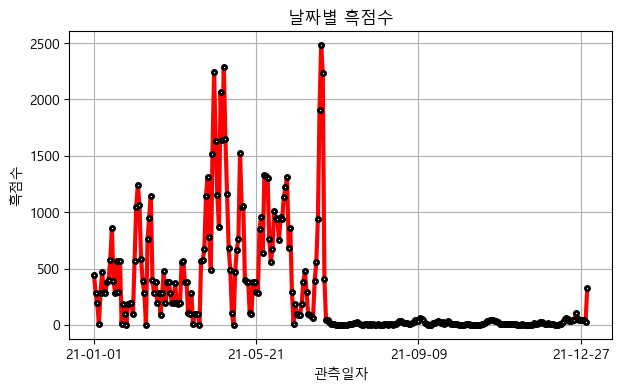

In [25]:
plt.figure()
plt.rcParams["figure.figsize"] = (20, 15)
plt.title('날짜별 흑점수')
plt.plot(cdf.index, cdf['흑점수'], color="#fc0303", linestyle='-', linewidth=3,
         marker="o", markersize = 3, markerfacecolor = "#ffffff",
         markeredgecolor = "#000000", markeredgewidth=2)

plt.xlabel('관측일자')
plt.ylabel('흑점수')
plt.grid()

total_len = len(cdf.index)

plt.xticks(np.arange(0, total_len + 1, 100))
plt.show()
plt.close()

# 태양광 에너지 발전량 데이터 가져오기

  - 데이터 출처

    * https://www.data.go.kr/data/15065269/fileData.do#layer_data_infomation

In [26]:
sf = pd.read_csv("C:\\Users\\User\\MDblue\\Bigdata\\수업내용\\과제물/태양광.csv", encoding = 'cp949')
sf.drop(['거래시간'], axis = 1, inplace = True)
sf

,거래일자,지역,발전량
0,2018-01-01,강원도,13.680
1,2018-01-01,강원도,0.000
2,2018-01-01,강원도,14.400
3,2018-01-01,강원도,0.000
4,2018-01-01,강원도,0.000
...,...,...,...
596083,2021-12-31,충청북도,47668.337
596084,2021-12-31,충청북도,41720.571
596085,2021-12-31,충청북도,23464.794
596086,2021-12-31,충청북도,8098.187


# 2021년도 데이터 산출하기

In [27]:
# 시작일과 종료일 설정

start_date = '2021-01-01'
end_date = '2021-12-31'
# 검색 기간에 따른 데이터 추출
ssf = sf.query("`거래일자` >= @ start_date and `거래일자` <= @end_date")
ssf


,거래일자,지역,발전량
447168,2021-01-01,강원도,1076.659
447169,2021-01-01,강원도,257.927
447170,2021-01-01,강원도,0.720
447171,2021-01-01,강원도,0.000
447172,2021-01-01,강원도,0.000
...,...,...,...
596083,2021-12-31,충청북도,47668.337
596084,2021-12-31,충청북도,41720.571
596085,2021-12-31,충청북도,23464.794
596086,2021-12-31,충청북도,8098.187


# 날짜와 지역별 태양광 에너지 데이터 전처리

In [28]:
sdf = ssf.groupby(['거래일자','지역']).sum()
sdf

발전량 
거래일자       지역               
2021-01-01 강원도   1141609.653
           경기도    573033.694
           경상남도   768190.354
           경상북도   981012.455
           광주시     21928.302
...                      ...
2021-12-31 전라남도  3708362.468
           전라북도  1208194.009
           제주도    621527.670
           충청남도  1740624.960
           충청북도   836706.701

[6205 rows x 1 columns]

# 날짜별 태양광 에너지 발전량 전처리

#### 태양열 에너지의 발전량 단위는 KWh 이므로 MWh 로 변환

In [29]:
dsdf = sdf.groupby(['거래일자']).sum()
dsdf = dsdf.reset_index(drop = False, inplace = False)
dsdf.columns = ['관측일자','태양광전력생산량(MWh)']
dsdf['태양광전력생산량(MWh)'] = np.multiply(dsdf['태양광전력생산량(MWh)'], 0.001)
dsdf

,관측일자,태양광전력생산량(MWh)
0,2021-01-01,7723.594647
1,2021-01-02,13213.417618
2,2021-01-03,11322.881387
3,2021-01-04,11816.853501
4,2021-01-05,9584.503206
...,...,...
360,2021-12-27,12154.772009
361,2021-12-28,8645.685171
362,2021-12-29,9480.690829
363,2021-12-30,14850.845248


In [30]:
dsdf.copy()
dsdf['관측일자'] = dsdf['관측일자'].astype('str')
dsdf['관측일자'] = pd.to_datetime(dsdf['관측일자'])
dsdf['관측일자'] = dsdf['관측일자'].apply(lambda x : dt.datetime.strftime(x, '%y-%m-%d'))

dsdf2 = dsdf.set_index('관측일자')
dsdf2

,태양광전력생산량(MWh)
관측일자,
21-01-01,7723.594647
21-01-02,13213.417618
21-01-03,11322.881387
21-01-04,11816.853501
21-01-05,9584.503206
...,...
21-12-27,12154.772009
21-12-28,8645.685171
21-12-29,9480.690829


# 지역별 태양광 에너지 발전량 전처리

#### 태양열 에너지의 발전량 단위는 KWh 이므로 MWh 로 변환

In [31]:
sdf2 = sdf.groupby(['지역']).sum()
sdf2 = sdf2.sort_values('지역')
sdf3 = sdf2.reset_index(drop = False, inplace = False)
sdf3.columns = ['지역','태양광전력생산량(MWh)']
sdf3['태양광전력생산량(MWh)'] = np.multiply(sdf3['태양광전력생산량(MWh)'], 0.001)
sdf3

,지역,태양광전력생산량(MWh)
0,강원도,5.617457e+05
1,경기도,3.062760e+05
2,경상남도,3.884844e+05
3,경상북도,6.723856e+05
4,광주시,6.968133e+04
5,대구시,5.558218e+04
6,대전시,1.459963e+04
7,부산시,9.296411e+04
8,서울시,1.698200e+04
9,세종시,2.611707e+04


#### 지역별 태양에너지 생산금액 데이터 추가
- 2021년 기준 태양광의 생산단가는 1kWh 당 93.4원 = 1MWh 당 93,400

In [32]:
sdf3['태양광생산금액(원)'] = np.multiply(sdf3['태양광전력생산량(MWh)'], 93400)
scdf = sdf3
scdf

,지역,태양광전력생산량(MWh),태양광생산금액(원)
0,강원도,5.617457e+05,5.246705e+10
1,경기도,3.062760e+05,2.860618e+10
2,경상남도,3.884844e+05,3.628444e+10
3,경상북도,6.723856e+05,6.280081e+10
4,광주시,6.968133e+04,6.508237e+09
5,대구시,5.558218e+04,5.191376e+09
6,대전시,1.459963e+04,1.363605e+09
7,부산시,9.296411e+04,8.682848e+09
8,서울시,1.698200e+04,1.586119e+09
9,세종시,2.611707e+04,2.439334e+09


In [33]:
sdf3.dtypes

지역                object
태양광전력생산량(MWh)    float64
태양광생산금액(원)       float64
dtype: object

# 에너지 소비 전력 데이터 가져오기

  - 데이터 출처:

    * https://kosis.kr/search/search.do#none

In [34]:
ef = read_excel("C:\\Users\\User\\MDblue\\Bigdata\\수업내용\\과제물/지역별에너지원소비실적.xlsx")
ef

d:\python\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,지역별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6
0,지역별(1),업체수 (개),합계 (toe),연료 (toe),연료 (toe),연료 (toe),연료 (toe),전력 (MWh)
1,지역별(1),소계,소계,소계,석탄류,석유류,가스류,소계
2,계,3047,104233378,86534226,35775266,4847431,45911530,205804088
3,서울,33,377290,266437,-,2005,264432,1288990
4,부산,100,738556,404058,43657,4677,355724,3889507
5,대구,112,1056328,850018,178296,81897,589825,2398953
6,인천,123,4653756,3982716,28652,22919,3931145,7802790
7,광주,48,336299,200269,-,7635,192634,1581737
8,대전,48,396631,227112,-,8701,218412,1971151
9,울산,184,11609861,9124018,570614,1233380,7320024,28905151


# 지역별 에너지 소비량 데이터 전처리

In [35]:
eef = ef.rename(columns = ef.iloc[0])
eef.drop([0,1,2], axis = 0, inplace = True)
eef2 = eef.rename(columns={'지역별(1)' : '지역','전력 (MWh)' : '소비전력(MWh)'})
eef

,지역별(1),업체수 (개),합계 (toe),연료 (toe),연료 (toe),연료 (toe),연료 (toe),전력 (MWh)
3,서울,33,377290,266437,-,2005,264432,1288990
4,부산,100,738556,404058,43657,4677,355724,3889507
5,대구,112,1056328,850018,178296,81897,589825,2398953
6,인천,123,4653756,3982716,28652,22919,3931145,7802790
7,광주,48,336299,200269,-,7635,192634,1581737
8,대전,48,396631,227112,-,8701,218412,1971151
9,울산,184,11609861,9124018,570614,1233380,7320024,28905151
10,세종,30,175291,57648,-,7486,50162,1367931
11,경기,680,18215915,14182089,475843,236961,13469285,46904949
12,강원,61,4390806,3977894,3055180,371072,551642,4801296


In [36]:

eef2.columns = ['지역','지','금' ,'사','용','안','함','소비전력(MWh)']
# eef2
gef1= eef2.filter(['지역','소비전력(MWh)'])
gef = gef1.sort_values('지역')
gef['지역'] = gef['지역'].map({'강원':'강원도', '경기':'경기도', '경남':'경상남도', '경북':'경상북도', '광주':'광주시', '대구':'대구시', '대전':'대전시', '부산':'부산시', '서울':'서울시', '울산':'울산시', '인천':'인천시', '전남':'전라남도', '전북':'전라북도', '충남':'충청남도', '충북':'충청북도', '제주' : '제주도','세종' : '세종시'})
gef


,지역,소비전력(MWh)
12,강원도,4801296
11,경기도,46904949
18,경상남도,11068593
17,경상북도,21007135
7,광주시,1581737
5,대구시,2398953
8,대전시,1971151
4,부산시,3889507
3,서울시,1288990
10,세종시,1367931


#### 전체 에너지 소비량 대한 가중치 부여

  - 2021년 총에너지 생산량 중 신재생에너지 비중은 7.5% 이다.
  - 2021년 신재생에너지 중 태양광에너지의 비중은 18% 이다.
  - 2021년 기준 태양광의 생산단가는 1kWh 당 93.4원 = 1MWh 당 93,400

  -참고 자료 : 
    
    * http://blog.energy.or.kr/?p=27025
   
    * https://www.newstof.com/news/articleView.html?idxno=20204

#### 비중에 따른 신재생에너지소비전력과 태양에너지소비전력 데이터

In [37]:
gef['신재생에너지소비전력(MWh)'] = np.multiply(gef['소비전력(MWh)'], 0.18)
gef['태양에너지소비전력(MWh)'] = np.multiply(gef['신재생에너지소비전력(MWh)'],0.075)
gef

,지역,소비전력(MWh),신재생에너지소비전력(MWh),태양에너지소비전력(MWh)
12,강원도,4801296,864233.28,64817.496
11,경기도,46904949,8442890.82,633216.8115
18,경상남도,11068593,1992346.74,149426.0055
17,경상북도,21007135,3781284.3,283596.3225
7,광주시,1581737,284712.66,21353.4495
5,대구시,2398953,431811.54,32385.8655
8,대전시,1971151,354807.18,26610.5385
4,부산시,3889507,700111.26,52508.3445
3,서울시,1288990,232018.2,17401.365
10,세종시,1367931,246227.58,18467.0685


#### 지역별 태양에너지소비전력 데이터

In [38]:
gsef= gef.filter(['지역','태양에너지소비전력(MWh)'])
gsef

,지역,태양에너지소비전력(MWh)
12,강원도,64817.496
11,경기도,633216.8115
18,경상남도,149426.0055
17,경상북도,283596.3225
7,광주시,21353.4495
5,대구시,32385.8655
8,대전시,26610.5385
4,부산시,52508.3445
3,서울시,17401.365
10,세종시,18467.0685


#### 지역별 태양에너지 소비금액 데이터 추가
- 2021년 기준 태양광의 생산단가는 1kWh 당 93.4원 = 1MWh 당 93,400

In [39]:
gsef['태양에너지소비금액(원)'] = np.multiply(gsef['태양에너지소비전력(MWh)'], 93400)
gcdf = gsef
gcdf

,지역,태양에너지소비전력(MWh),태양에너지소비금액(원)
12,강원도,64817.496,6053954126.4
11,경기도,633216.8115,59142450194.099998
18,경상남도,149426.0055,13956388913.700001
17,경상북도,283596.3225,26487896521.499996
7,광주시,21353.4495,1994412183.3
5,대구시,32385.8655,3024839837.7
8,대전시,26610.5385,2485424295.9
4,부산시,52508.3445,4904279376.3
3,서울시,17401.365,1625287491.0
10,세종시,18467.0685,1724824197.9


# 날짜별 태양 흑점 수와 태양에너지 생산량 데이터 가져오기

In [44]:
sunplot = read_excel("C:\\Users\\User\\MDblue\\Bigdata\\수업내용\\과제물/에너지흑점수.xlsx")
sunplot

,관측일자,태양광전력생산량(MWh),흑점수
0,21-01-01,7723.594647,443.0
1,21-01-02,13213.417618,282.0
2,21-01-03,11322.881387,191.0
3,21-01-04,11816.853501,6.0
4,21-01-05,9584.503206,NaN
...,...,...,...
360,21-12-27,12154.772009,45.0
361,21-12-28,8645.685171,45.0
362,21-12-29,9480.690829,47.0
363,21-12-30,14850.845248,29.0
